## Importation packages

In [102]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
import re

## Extraction des données et premières manipulations

On transforme à l'issue de cette partie les données en une grande liste contenant les lignes brutes du json.

In [103]:
# Load JSON data from file
with open('../data/entities.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [104]:
len(data)

1218

In [105]:
list(data.values())[0]

'ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfrançaise\nⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémontaise\nⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise\nⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié Ⓚfrançaise\nⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise\nⓄHouy ⒻCaroline Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise\nⓄViolet ⒻEsther Ⓜfe de chambre Ⓐ24 ⒸFille Ⓚfrançaise\nⓅDesbroper ⒻFrançois Jules Ⓜaumônier du collège Ⓐ46 ⒸGarçon Ⓚfrançaise\nⓄApelmeau ⒻThérèse Ⓜdomestique Ⓐ49 ⒸFemme mariée Ⓚfrançaise\nⓅde Chaumont Ⓐ40 ⒸHomme marié Ⓚfrançaise\nⓄde Chaumont ⒻMathilde Ⓜprofess Ⓗsa fe Ⓐ30 ⒸFemme mariée Ⓚfrançaise\nⓄde Chaumont ⒻGeorges Ⓗle fils Ⓐ11 ⒸGarçon Ⓚfrançaise\nⓄde Chaumont ⒻHenro Ⓗle fils Ⓐ8 ⒸGarçon Ⓚfrançaise\nⓄde Chaumont ⒻGaston Ⓗle fils Ⓐ5 ⒸGarçon Ⓚfrançaise\nⓄVoisin ⒻAnne Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise\nⓅAllemant ⒻPhilippe Ⓜtailleur Ⓐ45 ⒸHomme marié Ⓚfrançaise\nⓄDutertre ⒻAdèle Ⓜouvrière Ⓗsa femme Ⓐ45 ⒸFemme mariée Ⓚfrançaise\nⓅGaucheron ⒻJoachim Florentin Ⓜpharmacien Ⓐ30 ⒸHomme m

In [106]:
def line_to_list(line):
    return(line.split("\n"))

In [107]:
line_to_list(list(data.values())[0])

['ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfrançaise',
 'ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémontaise',
 'ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise',
 'ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié Ⓚfrançaise',
 'ⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise',
 'ⓄHouy ⒻCaroline Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓄViolet ⒻEsther Ⓜfe de chambre Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓅDesbroper ⒻFrançois Jules Ⓜaumônier du collège Ⓐ46 ⒸGarçon Ⓚfrançaise',
 'ⓄApelmeau ⒻThérèse Ⓜdomestique Ⓐ49 ⒸFemme mariée Ⓚfrançaise',
 'Ⓟde Chaumont Ⓐ40 ⒸHomme marié Ⓚfrançaise',
 'Ⓞde Chaumont ⒻMathilde Ⓜprofess Ⓗsa fe Ⓐ30 ⒸFemme mariée Ⓚfrançaise',
 'Ⓞde Chaumont ⒻGeorges Ⓗle fils Ⓐ11 ⒸGarçon Ⓚfrançaise',
 'Ⓞde Chaumont ⒻHenro Ⓗle fils Ⓐ8 ⒸGarçon Ⓚfrançaise',
 'Ⓞde Chaumont ⒻGaston Ⓗle fils Ⓐ5 ⒸGarçon Ⓚfrançaise',
 'ⓄVoisin ⒻAnne Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓅAllemant ⒻPhilippe Ⓜtailleur Ⓐ45 ⒸHomme marié Ⓚfrançaise',
 'ⓄDutertre ⒻAdèle Ⓜouvrière Ⓗsa femme Ⓐ45 ⒸFemme mariée Ⓚfrançaise',
 'ⓅG

In [108]:
def json_to_big_list(data):
    concatenated_list = []
    for value in data.values():
        if len(value) >= 1:
            concatenated_list.extend(line_to_list(value))
    return concatenated_list

In [109]:
big_list = json_to_big_list(data)

In [110]:
len(big_list)

25081

In [111]:
for i in range(len(big_list)):
    print(big_list[i])

ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfrançaise
ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémontaise
ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise
ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié Ⓚfrançaise
ⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise
ⓄHouy ⒻCaroline Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise
ⓄViolet ⒻEsther Ⓜfe de chambre Ⓐ24 ⒸFille Ⓚfrançaise
ⓅDesbroper ⒻFrançois Jules Ⓜaumônier du collège Ⓐ46 ⒸGarçon Ⓚfrançaise
ⓄApelmeau ⒻThérèse Ⓜdomestique Ⓐ49 ⒸFemme mariée Ⓚfrançaise
Ⓟde Chaumont Ⓐ40 ⒸHomme marié Ⓚfrançaise
Ⓞde Chaumont ⒻMathilde Ⓜprofess Ⓗsa fe Ⓐ30 ⒸFemme mariée Ⓚfrançaise
Ⓞde Chaumont ⒻGeorges Ⓗle fils Ⓐ11 ⒸGarçon Ⓚfrançaise
Ⓞde Chaumont ⒻHenro Ⓗle fils Ⓐ8 ⒸGarçon Ⓚfrançaise
Ⓞde Chaumont ⒻGaston Ⓗle fils Ⓐ5 ⒸGarçon Ⓚfrançaise
ⓄVoisin ⒻAnne Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise
ⓅAllemant ⒻPhilippe Ⓜtailleur Ⓐ45 ⒸHomme marié Ⓚfrançaise
ⓄDutertre ⒻAdèle Ⓜouvrière Ⓗsa femme Ⓐ45 ⒸFemme mariée Ⓚfrançaise
ⓅGaucheron ⒻJoachim Florentin Ⓜpharmacien Ⓐ30 ⒸHomme marié Ⓚfrançaise
ⓄS

## Transformation de la liste en dataframe

In [112]:
with open("../data/tokens.yml", "r", encoding="utf-8") as f:
    data_token = yaml.safe_load(f)

print(data_token)

{'age': {'start': 'Ⓐ', 'end': ''}, 'birth_date': {'start': 'Ⓑ', 'end': ''}, 'civil_status': {'start': 'Ⓒ', 'end': ''}, 'education_level': {'start': 'Ⓓ', 'end': ''}, 'employer': {'start': 'Ⓔ', 'end': ''}, 'firstname': {'start': 'Ⓕ', 'end': ''}, 'link': {'start': 'Ⓗ', 'end': ''}, 'lob': {'start': 'Ⓘ', 'end': ''}, 'maiden_name': {'start': 'Ⓙ', 'end': ''}, 'nationality': {'start': 'Ⓚ', 'end': ''}, 'observation': {'start': 'Ⓛ', 'end': ''}, 'occupation': {'start': 'Ⓜ', 'end': ''}, 'surname': {'start': 'Ⓞ', 'end': ''}, 'surname_household': {'start': 'Ⓟ', 'end': ''}}


In [113]:
data_category = {
    'age': {'start': 'Ⓐ', 'end': ''},
    'birth_date': {'start': 'Ⓑ', 'end': ''},
    'civil_status': {'start': 'Ⓒ', 'end': ''},
    'education_level': {'start': 'Ⓓ', 'end': ''},
    'employer': {'start': 'Ⓔ', 'end': ''},
    'firstname': {'start': 'Ⓕ', 'end': ''},
    'link': {'start': 'Ⓗ', 'end': ''},
    'lob': {'start': 'Ⓘ', 'end': ''},
    'maiden_name': {'start': 'Ⓙ', 'end': ''},
    'nationality': {'start': 'Ⓚ', 'end': ''},
    'observation': {'start': 'Ⓛ', 'end': ''},
    'occupation': {'start': 'Ⓜ', 'end': ''},
    'surname': {'start': 'Ⓞ', 'end': ''},
    'surname_household': {'start': 'Ⓟ', 'end': ''}
}

# Convert dictionary to DataFrame
df_category = pd.DataFrame(data_category)

In [114]:
[df_category.iat[0,i] for i in range(len(df_category.columns))]

['Ⓐ', 'Ⓑ', 'Ⓒ', 'Ⓓ', 'Ⓔ', 'Ⓕ', 'Ⓗ', 'Ⓘ', 'Ⓙ', 'Ⓚ', 'Ⓛ', 'Ⓜ', 'Ⓞ', 'Ⓟ']

In [115]:
def split_on_letters(string, split_list):
    # Joining the letters in split_list into a regex pattern
    pattern = '|'.join(re.escape(letter) for letter in split_list)
    
    # Splitting the string using the regex pattern
    parts = re.split(pattern, string)
    
    return parts

# Example string
string = "HelloWorld!Howareyou?"

# List of letters to split on
split_list = [df_category.iat[0,i] for i in range(len(df_category.columns))]

# Splitting the string on the letters in split_list
result = split_on_letters(string, split_list)

# Print the result
print(result)

['HelloWorld!Howareyou?']


In [116]:
pd.DataFrame([split_on_letters(line, split_list) for line in big_list])

0                   1            2               3       4  \
0                   Breton      Cyrille       menuisier      25    
1                  Ferazzi      Auguste         vitrier      30    
2                   Machol       Pierre         vitrier      24    
3                  Desbois    Alexandre         prop re      48    
4                   Vignat        Zélie         prop re   sa fe    
...   ..                ...          ...             ...     ...   
25076     Chameton-Dideron        Marie            chef    1869    
25077                  Ode        Marie   ouv chaus res    chef    
25078                Berni        Nello       manoeuvre    chef    
25079        Berni-Laureti   Annunziata          épouse    1887    
25080                Berni        Primo            fils    1914    

                  5            6           7                 8     9  
0           Garçon     française        None              None  None  
1           Garçon   Piémontaise        None              None  None  
2           Garçon   Piémontaise        None              None  None  
3      Homme marié     française        None              None  None  
4               30     française        None              None  None  
...             ...          ...         ...               ...   ...  
25076         idem     Pailharès        None              None  None  
25077         Cara         1863        idem   St Naz en Royans  None  
25078      Baretto         1886   italienne             Castel  None  
25079         idem          idem        None              None  None  
25080         idem          idem        None              None  None  

[25081 rows x 10 columns]

In [117]:
[line for line in big_list]

['ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfrançaise',
 'ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémontaise',
 'ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise',
 'ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié Ⓚfrançaise',
 'ⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise',
 'ⓄHouy ⒻCaroline Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓄViolet ⒻEsther Ⓜfe de chambre Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓅDesbroper ⒻFrançois Jules Ⓜaumônier du collège Ⓐ46 ⒸGarçon Ⓚfrançaise',
 'ⓄApelmeau ⒻThérèse Ⓜdomestique Ⓐ49 ⒸFemme mariée Ⓚfrançaise',
 'Ⓟde Chaumont Ⓐ40 ⒸHomme marié Ⓚfrançaise',
 'Ⓞde Chaumont ⒻMathilde Ⓜprofess Ⓗsa fe Ⓐ30 ⒸFemme mariée Ⓚfrançaise',
 'Ⓞde Chaumont ⒻGeorges Ⓗle fils Ⓐ11 ⒸGarçon Ⓚfrançaise',
 'Ⓞde Chaumont ⒻHenro Ⓗle fils Ⓐ8 ⒸGarçon Ⓚfrançaise',
 'Ⓞde Chaumont ⒻGaston Ⓗle fils Ⓐ5 ⒸGarçon Ⓚfrançaise',
 'ⓄVoisin ⒻAnne Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓅAllemant ⒻPhilippe Ⓜtailleur Ⓐ45 ⒸHomme marié Ⓚfrançaise',
 'ⓄDutertre ⒻAdèle Ⓜouvrière Ⓗsa femme Ⓐ45 ⒸFemme mariée Ⓚfrançaise',
 'ⓅG

In [118]:
# List of symbols
symbols = ['Ⓐ', 'Ⓑ', 'Ⓒ', 'Ⓓ', 'Ⓔ', 'Ⓕ', 'Ⓗ', 'Ⓘ', 'Ⓙ', 'Ⓚ', 'Ⓛ', 'Ⓜ', 'Ⓞ', 'Ⓟ']

# Example sentences
sentences = ['ⒻHello ⒺWorld', 'ⒻHow are you?']

def clean_spaces(li):
    for i in range(len(li)-1):
        li[i] = str(li[i])[:-1]
    return li

# Function to create DataFrame
def create_dataframe(sentences, symbols):
    data = []

    for sentence in sentences:
        # Initialize a dictionary for the current sentence
        sentence_dict = {symbol: None for symbol in symbols}

        # Split the sentence based on symbols
        list_words = split_on_letters(sentence, split_list)[1:]
        list_words = clean_spaces(list_words)
        list_symbols = [char for char in sentence if char in symbols]
        print(list_words)
        print(list_symbols)

        for i in range(len(list_symbols)):
            sentence_dict[list_symbols[i]] = list_words[i]

        # Append the dictionary to the data list
        data.append(sentence_dict)

    # Create DataFrame
    df = pd.DataFrame(data)

    return df

# Create DataFrame
df_recensement = create_dataframe(big_list, symbols)

# Print DataFrame
df_recensement

['Breton', 'Cyrille', 'menuisier', '25', 'Garçon', 'française']
['Ⓞ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Ferazzi', 'Auguste', 'vitrier', '30', 'Garçon', 'Piémontaise']
['Ⓟ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Machol', 'Pierre', 'vitrier', '24', 'Garçon', 'Piémontaise']
['Ⓟ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Desbois', 'Alexandre', 'prop re', '48', 'Homme marié', 'française']
['Ⓟ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Vignat', 'Zélie', 'prop re', 'sa fe', '30', 'française']
['Ⓞ', 'Ⓕ', 'Ⓜ', 'Ⓗ', 'Ⓐ', 'Ⓚ']
['Houy', 'Caroline', 'domestique', '24', 'Fille', 'française']
['Ⓞ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Violet', 'Esther', 'fe de chambre', '24', 'Fille', 'française']
['Ⓞ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Desbroper', 'François Jules', 'aumônier du collège', '46', 'Garçon', 'française']
['Ⓟ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Apelmeau', 'Thérèse', 'domestique', '49', 'Femme mariée', 'française']
['Ⓞ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['de Chaumont', '40', 'Homme marié', 'française']
['Ⓟ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['de Chaumont', 'Mathilde', 'profess', 'sa 

Ⓐ     Ⓑ            Ⓒ     Ⓓ        Ⓔ           Ⓕ       Ⓗ  \
0        25  None       Garçon  None     None     Cyrille    None   
1        30  None       Garçon  None     None     Auguste    None   
2        24  None       Garçon  None     None      Pierre    None   
3        48  None  Homme marié  None     None   Alexandre    None   
4        30  None         None  None     None       Zélie   sa fe   
...     ...   ...          ...   ...      ...         ...     ...   
25076  None  1869         None  None     None       Marie    chef   
25077  None  1863         None  None     Cara       Marie    chef   
25078  None  1886         None  None  Baretto       Nello    chef   
25079  None  1887         None  None     None  Annunziata  épouse   
25080  None  1914         None  None     None       Primo    fils   

                      Ⓘ     Ⓙ            Ⓚ     Ⓛ              Ⓜ  \
0                  None  None    française  None      menuisier   
1                  None  None  Piémontaise  None        vitrier   
2                  None  None  Piémontaise  None        vitrier   
3                  None  None    française  None        prop re   
4                  None  None    française  None        prop re   
...                 ...   ...          ...   ...            ...   
25076         Pailharès  None         idem  None           None   
25077  St Naz en Royans  None         idem  None  ouv chaus res   
25078            Castel  None    italienne  None      manoeuvre   
25079              idem  None         idem  None           None   
25080              idem  None         idem  None           None   

                   Ⓞ                 Ⓟ  
0             Breton              None  
1               None           Ferazzi  
2               None            Machol  
3               None           Desbois  
4             Vignat              None  
...              ...               ...  
25076           None  Chameton-Dideron  
25077           None               Ode  
25078           None             Berni  
25079  Berni-Laureti              None  
25080          Berni              None  

[25081 rows x 14 columns]

In [119]:
data_category.keys()

dict_keys(['age', 'birth_date', 'civil_status', 'education_level', 'employer', 'firstname', 'link', 'lob', 'maiden_name', 'nationality', 'observation', 'occupation', 'surname', 'surname_household'])

In [120]:
df_category

age birth_date civil_status education_level employer firstname link lob  \
start   Ⓐ          Ⓑ            Ⓒ               Ⓓ        Ⓔ         Ⓕ    Ⓗ   Ⓘ   
end                                                                             

      maiden_name nationality observation occupation surname surname_household  
start           Ⓙ           Ⓚ           Ⓛ          Ⓜ       Ⓞ                 Ⓟ  
end

In [121]:
df_recensement

Ⓐ     Ⓑ            Ⓒ     Ⓓ        Ⓔ           Ⓕ       Ⓗ  \
0        25  None       Garçon  None     None     Cyrille    None   
1        30  None       Garçon  None     None     Auguste    None   
2        24  None       Garçon  None     None      Pierre    None   
3        48  None  Homme marié  None     None   Alexandre    None   
4        30  None         None  None     None       Zélie   sa fe   
...     ...   ...          ...   ...      ...         ...     ...   
25076  None  1869         None  None     None       Marie    chef   
25077  None  1863         None  None     Cara       Marie    chef   
25078  None  1886         None  None  Baretto       Nello    chef   
25079  None  1887         None  None     None  Annunziata  épouse   
25080  None  1914         None  None     None       Primo    fils   

                      Ⓘ     Ⓙ            Ⓚ     Ⓛ              Ⓜ  \
0                  None  None    française  None      menuisier   
1                  None  None  Piémontaise  None        vitrier   
2                  None  None  Piémontaise  None        vitrier   
3                  None  None    française  None        prop re   
4                  None  None    française  None        prop re   
...                 ...   ...          ...   ...            ...   
25076         Pailharès  None         idem  None           None   
25077  St Naz en Royans  None         idem  None  ouv chaus res   
25078            Castel  None    italienne  None      manoeuvre   
25079              idem  None         idem  None           None   
25080              idem  None         idem  None           None   

                   Ⓞ                 Ⓟ  
0             Breton              None  
1               None           Ferazzi  
2               None            Machol  
3               None           Desbois  
4             Vignat              None  
...              ...               ...  
25076           None  Chameton-Dideron  
25077           None               Ode  
25078           None             Berni  
25079  Berni-Laureti              None  
25080          Berni              None  

[25081 rows x 14 columns]

In [122]:
dict(zip(df_recensement.columns, data_category.keys()))

{'Ⓐ': 'age',
 'Ⓑ': 'birth_date',
 'Ⓒ': 'civil_status',
 'Ⓓ': 'education_level',
 'Ⓔ': 'employer',
 'Ⓕ': 'firstname',
 'Ⓗ': 'link',
 'Ⓘ': 'lob',
 'Ⓙ': 'maiden_name',
 'Ⓚ': 'nationality',
 'Ⓛ': 'observation',
 'Ⓜ': 'occupation',
 'Ⓞ': 'surname',
 'Ⓟ': 'surname_household'}

In [123]:
df_recensement = df_recensement.rename(columns=dict(zip(df_recensement.columns, data_category.keys())))

#### Remplacement des idems

In [124]:
df_recensement

age birth_date civil_status education_level employer   firstname  \
0        25       None       Garçon            None     None     Cyrille   
1        30       None       Garçon            None     None     Auguste   
2        24       None       Garçon            None     None      Pierre   
3        48       None  Homme marié            None     None   Alexandre   
4        30       None         None            None     None       Zélie   
...     ...        ...          ...             ...      ...         ...   
25076  None       1869         None            None     None       Marie   
25077  None       1863         None            None     Cara       Marie   
25078  None       1886         None            None  Baretto       Nello   
25079  None       1887         None            None     None  Annunziata   
25080  None       1914         None            None     None       Primo   

         link               lob maiden_name  nationality observation  \
0        None              None        None    française        None   
1        None              None        None  Piémontaise        None   
2        None              None        None  Piémontaise        None   
3        None              None        None    française        None   
4       sa fe              None        None    française        None   
...       ...               ...         ...          ...         ...   
25076    chef         Pailharès        None         idem        None   
25077    chef  St Naz en Royans        None         idem        None   
25078    chef            Castel        None    italienne        None   
25079  épouse              idem        None         idem        None   
25080    fils              idem        None         idem        None   

          occupation        surname surname_household  
0          menuisier         Breton              None  
1            vitrier           None           Ferazzi  
2            vitrier           None            Machol  
3            prop re           None           Desbois  
4            prop re         Vignat              None  
...              ...            ...               ...  
25076           None           None  Chameton-Dideron  
25077  ouv chaus res           None               Ode  
25078      manoeuvre           None             Berni  
25079           None  Berni-Laureti              None  
25080           None          Berni              None  

[25081 rows x 14 columns]

In [125]:
for column in df_recensement.columns:
    print(f"Nombre de idem / Idem dans la colonne {column} : {df_recensement[column].value_counts().get('idem', 0)}" +
           f" / {df_recensement[column].value_counts().get('Idem', 0)}")

Nombre de idem / Idem dans la colonne age : 3 / 0
Nombre de idem / Idem dans la colonne birth_date : 1 / 0
Nombre de idem / Idem dans la colonne civil_status : 0 / 0
Nombre de idem / Idem dans la colonne education_level : 0 / 0
Nombre de idem / Idem dans la colonne employer : 605 / 1
Nombre de idem / Idem dans la colonne firstname : 16 / 0
Nombre de idem / Idem dans la colonne link : 2138 / 3
Nombre de idem / Idem dans la colonne lob : 3378 / 13
Nombre de idem / Idem dans la colonne maiden_name : 0 / 0
Nombre de idem / Idem dans la colonne nationality : 4449 / 5
Nombre de idem / Idem dans la colonne observation : 88 / 0
Nombre de idem / Idem dans la colonne occupation : 3695 / 0
Nombre de idem / Idem dans la colonne surname : 669 / 5
Nombre de idem / Idem dans la colonne surname_household : 4 / 0


In [126]:
df_recensement.isnull().sum()

age                   8645
birth_date           17737
civil_status         14376
education_level      25081
employer             22170
firstname              150
link                  4345
lob                  15845
maiden_name          25081
nationality          11767
observation          24479
occupation            8902
surname               5922
surname_household    19441
dtype: int64

Le remplacement en tant que tel :

In [127]:
df_recensement.fillna("should_be_None", inplace=True)
df_recensement.replace('idem', None, inplace=True)
df_recensement.replace('Idem', None, inplace=True)
df_recensement.fillna(method='ffill', inplace=True)
df_recensement.replace("should_be_None", None, inplace=True)

C:\Users\Serv3\AppData\Local\Temp\ipykernel_19600\59354610.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_recensement.fillna(method='ffill', inplace=True)


On vérifie ensuite que ça s'est bien passé.

In [128]:
for column in df_recensement.columns:
    print(f"Nombre de idem / Idem dans la colonne {column} : {df_recensement[column].value_counts().get('idem', 0)}" +
           f" / {df_recensement[column].value_counts().get('Idem', 0)}")

Nombre de idem / Idem dans la colonne age : 0 / 0
Nombre de idem / Idem dans la colonne birth_date : 0 / 0
Nombre de idem / Idem dans la colonne civil_status : 0 / 0
Nombre de idem / Idem dans la colonne education_level : 0 / 0
Nombre de idem / Idem dans la colonne employer : 0 / 0
Nombre de idem / Idem dans la colonne firstname : 0 / 0
Nombre de idem / Idem dans la colonne link : 0 / 0
Nombre de idem / Idem dans la colonne lob : 0 / 0
Nombre de idem / Idem dans la colonne maiden_name : 0 / 0
Nombre de idem / Idem dans la colonne nationality : 0 / 0
Nombre de idem / Idem dans la colonne observation : 0 / 0
Nombre de idem / Idem dans la colonne occupation : 0 / 0
Nombre de idem / Idem dans la colonne surname : 0 / 0
Nombre de idem / Idem dans la colonne surname_household : 0 / 0


In [129]:
df_recensement

age birth_date civil_status education_level employer   firstname  \
0        25       None       Garçon            None     None     Cyrille   
1        30       None       Garçon            None     None     Auguste   
2        24       None       Garçon            None     None      Pierre   
3        48       None  Homme marié            None     None   Alexandre   
4        30       None         None            None     None       Zélie   
...     ...        ...          ...             ...      ...         ...   
25076  None       1869         None            None     None       Marie   
25077  None       1863         None            None     Cara       Marie   
25078  None       1886         None            None  Baretto       Nello   
25079  None       1887         None            None     None  Annunziata   
25080  None       1914         None            None     None       Primo   

         link               lob maiden_name  nationality observation  \
0        None              None        None    française        None   
1        None              None        None  Piémontaise        None   
2        None              None        None  Piémontaise        None   
3        None              None        None    française        None   
4       sa fe              None        None    française        None   
...       ...               ...         ...          ...         ...   
25076    chef         Pailharès        None    française        None   
25077    chef  St Naz en Royans        None    française        None   
25078    chef            Castel        None    italienne        None   
25079  épouse            Castel        None    italienne        None   
25080    fils            Castel        None    italienne        None   

          occupation        surname surname_household  
0          menuisier         Breton              None  
1            vitrier           None           Ferazzi  
2            vitrier           None            Machol  
3            prop re           None           Desbois  
4            prop re         Vignat              None  
...              ...            ...               ...  
25076           None           None  Chameton-Dideron  
25077  ouv chaus res           None               Ode  
25078      manoeuvre           None             Berni  
25079           None  Berni-Laureti              None  
25080           None          Berni              None  

[25081 rows x 14 columns]

In [130]:
df_recensement.isnull().sum()

age                   8645
birth_date           17737
civil_status         14376
education_level      25081
employer             22227
firstname              150
link                  4389
lob                  16014
maiden_name          25081
nationality          12195
observation          24488
occupation            9094
surname               6107
surname_household    19445
dtype: int64

In [131]:
df_recensement.to_csv("../data_cleaned/df_recensement.csv")

#### Elimination des lignes avec link vide

In [132]:
df_recensement.isnull().sum()

age                   8645
birth_date           17737
civil_status         14376
education_level      25081
employer             22227
firstname              150
link                  4389
lob                  16014
maiden_name          25081
nationality          12195
observation          24488
occupation            9094
surname               6107
surname_household    19445
dtype: int64

In [133]:
colonne_a_traiter = 'link'
df_recensement = df_recensement.dropna(subset=[colonne_a_traiter])

In [134]:
df_recensement.isnull().sum()

age                   7699
birth_date           13556
civil_status         13977
education_level      20692
employer             17921
firstname               66
link                     0
lob                  12152
maiden_name          20692
nationality           8407
observation          20302
occupation            7898
surname               4509
surname_household    16589
dtype: int64

In [135]:
df_recensement.count()

age                  12993
birth_date            7136
civil_status          6715
education_level          0
employer              2771
firstname            20626
link                 20692
lob                   8540
maiden_name              0
nationality          12285
observation            390
occupation           12794
surname              16183
surname_household     4103
dtype: int64

#### Drop les colonnes qui sont entièrement vides ou quasiment

In [136]:
columns_to_drop = ["education_level", "maiden_name", "observation"]
df_recensement = df_recensement.drop(columns=columns_to_drop)

In [137]:
df_recensement.count()

age                  12993
birth_date            7136
civil_status          6715
employer              2771
firstname            20626
link                 20692
lob                   8540
nationality          12285
occupation           12794
surname              16183
surname_household     4103
dtype: int64

## Transformation des champs textuels

#### Création valeur target 0 / 1

In [138]:
array_chief_name = df_recensement[(df_recensement['link'].str.lower().str.contains('chef') 
                & ~df_recensement['link'].str.lower().str.contains('fille')
                & ~df_recensement['link'].str.lower().str.contains('mère')
                & ~df_recensement['link'].str.lower().str.contains('père')
                & ~df_recensement['link'].str.lower().str.contains('fils')
                & ~df_recensement['link'].str.lower().str.contains('sœur')
                & ~df_recensement['link'].str.lower().str.contains('frère')
                & ~df_recensement['link'].str.lower().str.contains('gendre')
                & ~df_recensement['link'].str.lower().str.contains('soeur')
                & ~df_recensement['link'].str.lower().str.contains('oncle')
                & ~df_recensement['link'].str.lower().str.contains('nièce')
                & ~df_recensement['link'].str.lower().str.contains('femme')
                & ~df_recensement['link'].str.lower().str.contains('parent')
                & ~df_recensement['link'].str.lower().str.contains('neveu')
                & ~df_recensement['link'].str.lower().str.contains('mére')
                & ~df_recensement['link'].str.lower().str.contains('fem')
                & ~df_recensement['link'].str.lower().str.contains('domestique')
                & ~df_recensement['link'].str.lower().str.contains('née')
                & ~df_recensement['link'].str.lower().str.contains('pension')
                & ~df_recensement['link'].str.lower().str.contains('adjointe')
                & ~df_recensement['link'].str.lower().str.contains('épouse')
                & ~df_recensement['link'].str.lower().str.contains('tante')
                )]["link"].unique()

In [139]:
array_chief_name

array(['chef', 'Chef de ménage', 'chef de ménage', 'chef du ménage',
       'chef de famille', 'chef de mge', 'chef de flle', 'chef de maison',
       'chef ménage', 'Chef', 'chef de m', 'chef de m.', 'chef m ge',
       'chef veuf', 'chef de mén', 'chef de fam',
       'chef de ménage et veuve', 'Chef de menage', 'chef de mén.',
       'chef de f le', 'chef de mé', 'veuve Corte chef de ménage',
       'veuve Gorer chef de ménage', 'veuve meunier chef de ménage',
       'veuve Bouillet chef de ménage', 'f du chef', 'chef de f',
       'chef de m ge', 'chef de m e', 'chef d m', 'chef religieuse',
       'chef de mé age', 'chef de mange', 'célibataire chef de ménage',
       'Chef de mén', 'journalier chef de menage',
       'cultivateur chef de menage', 'cultivateur chef de ménage',
       'propriétaire et chef de ménage', 'chef de poste',
       'CHEF DE MENAGE', 'chef de méange', 'chef de m⁇nage'], dtype=object)

In [140]:
list_chief_name = list(array_chief_name)

df_recensement["target"] = df_recensement["link"].apply(lambda x: 1 if x in list_chief_name else 0)

In [141]:
df_recensement["target"].sum()

4637

On veut prédire le fait d'être le chef de famille (variable binaire) à partir des autres champs.

In [142]:
df_recensement.nunique()

age                   242
birth_date            150
civil_status            6
employer             1046
firstname            2125
link                  935
lob                  2786
nationality            61
occupation           1558
surname              7078
surname_household    3107
target                  2
dtype: int64

#### Equilibrage du dataframe

In [143]:
print(f"Nombre de chef de famille : {df_recensement["target"].sum()}")
print(f"Nombre total de personnes : {len(df_recensement["target"])}")

Nombre de chef de famille : 4637
Nombre total de personnes : 20692


In [144]:
column_name = 'target'
num_rows_to_remove = len(df_recensement["target"]) - 2*df_recensement["target"].sum()

# Filter rows where column contains 0
zero_rows = df_recensement[df_recensement[column_name] == 0]

# Randomly select rows to remove
rows_to_remove = zero_rows.sample(n=num_rows_to_remove).index

# Remove selected rows
df_recensement = df_recensement.drop(rows_to_remove)

df_recensement.reset_index(inplace=True)

In [145]:
print(f"Nombre de chef de famille : {df_recensement["target"].sum()}")
print(f"Nombre total de personnes : {len(df_recensement["target"])}")

Nombre de chef de famille : 4637
Nombre total de personnes : 9274


In [146]:
df_recensement.head()

index   age birth_date  civil_status employer firstname     link  \
0      4    30       None          None     None     Zélie    sa fe   
1     12     8       None        Garçon     None     Henro  le fils   
2     18    23       None  Femme mariée     None  Virginie    sa fe   
3     37  None       1877          None      P.O      Elie     chef   
4     41  None       1910          None     None      René   enfant   

         lob nationality     occupation      surname surname_household  target  
0       None   française        prop re       Vignat              None       0  
1       None   française           None  de Chaumont              None       0  
2       None   française  s. profession        Sagot              None       0  
3  Cercottes   française       tourneur         None             Furet       1  
4    Orléans   française          néant        Furet              None       0

#### Transformation de la colonne nom en une valeur quantitative

In [147]:
firstname_with_sex = pd.read_csv("../data/firstname_with_sex.csv", sep=";")

In [148]:
firstname_with_sex

firstname     male   female
0        marie    10145  2390322
1         jean  1869615     6476
2       pierre  1475841     5047
3       jeanne     1765  1097397
4     françois  1089009     5951
...        ...      ...      ...
6941   winnocq       10        0
6942     xyste        9        1
6943      zara        0       10
6944  zéraphin       10        0
6945     zimle        0       10

[6946 rows x 3 columns]

In [149]:
def from_name_to_value(x):
    if x is None or len(x) == 0:
        return 0
    else:
        x_first_lowcase = x.split()[0].lower()
        if firstname_with_sex[firstname_with_sex["firstname"] == x_first_lowcase].empty:
            return 0
        else:
            return np.arcsin((firstname_with_sex.loc[firstname_with_sex["firstname"] == x_first_lowcase, "male"].iloc[0] 
        - firstname_with_sex.loc[firstname_with_sex["firstname"] == x_first_lowcase, "female"].iloc[0]) /
        (firstname_with_sex.loc[firstname_with_sex["firstname"] == x_first_lowcase, "male"].iloc[0] 
        + firstname_with_sex.loc[firstname_with_sex["firstname"] == x_first_lowcase, "female"].iloc[0])
        ) * 2 / np.pi
        #J'utilise ici arcsin pour éclater mes valeurs qui sont très proches de -1 et 1 pour mieux voir ce qui se passe
        #probablement mieux aussi pour certains modèles

df_recensement["value_name"] = df_recensement["firstname"].apply(from_name_to_value)

In [150]:
df_recensement["value_name"].describe()

count    9274.000000
mean        0.146888
std         0.892173
min        -1.000000
25%        -0.922762
50%         0.903462
75%         0.923441
max         1.000000
Name: value_name, dtype: float64

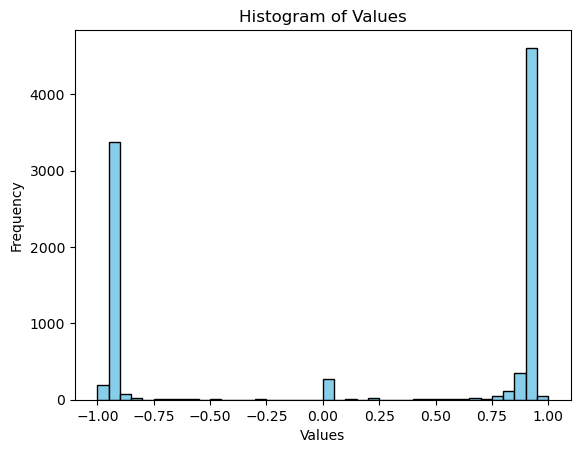

In [151]:
df_recensement["value_name"]

plt.hist(df_recensement["value_name"], bins=40, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

# Show plot
plt.show()

In [152]:
df_recensement.head()

index   age birth_date  civil_status employer firstname     link  \
0      4    30       None          None     None     Zélie    sa fe   
1     12     8       None        Garçon     None     Henro  le fils   
2     18    23       None  Femme mariée     None  Virginie    sa fe   
3     37  None       1877          None      P.O      Elie     chef   
4     41  None       1910          None     None      René   enfant   

         lob nationality     occupation      surname surname_household  \
0       None   française        prop re       Vignat              None   
1       None   française           None  de Chaumont              None   
2       None   française  s. profession        Sagot              None   
3  Cercottes   française       tourneur         None             Furet   
4    Orléans   française          néant        Furet              None   

   target  value_name  
0       0   -0.923684  
1       0    0.000000  
2       0   -0.948193  
3       1    0.769285  
4       0    0.917308

#### Transformation de la variable civil_status en variables catégorielles

In [153]:
df_recensement["civil_status"].unique()

array([None, 'Garçon', 'Femme mariée', 'Fille', 'Homme marié', 'Veuf',
       'Veuve'], dtype=object)

In [154]:
def sex_from_civil_status(x):
    if x is None:
        return 0
    elif x == "Garçon" or x == "Homme marié" or x == "Veuf":
        return 1
    else:
        return -1

df_recensement["sex_from_civil_status"] = df_recensement["civil_status"].apply(sex_from_civil_status)

In [155]:
df_recensement.groupby("sex_from_civil_status").count()

index   age  birth_date  civil_status  employer  \
sex_from_civil_status                                                    
-1                      1167  1074           4          1167         0   
 0                      6762  3255        3466             0      1783   
 1                      1345  1284           3          1345         3   

                       firstname  link   lob  nationality  occupation  \
sex_from_civil_status                                                   
-1                          1159  1167   228          151         186   
 0                          6745  6762  3519         5576        5878   
 1                          1334  1345   336          239         769   

                       surname  surname_household  target  value_name  
sex_from_civil_status                                                  
-1                        1074                 81    1167        1167  
 0                        3420               3224    6762        6762  
 1                         758                582    1345        1345

In [156]:
df_recensement["widow_encoding"] = df_recensement["civil_status"].apply(lambda x:1 if x == "Veuve" else 0)

In [157]:
df_recensement["widower_encoding"] = df_recensement["civil_status"].apply(lambda x:1 if x == "Veuf" else 0)

In [158]:
df_recensement["married_man_encoding"] = df_recensement["civil_status"].apply(lambda x:1 if x == "Homme marié" else 0)

In [159]:
df_recensement["girl_encoding"] = df_recensement["civil_status"].apply(lambda x:1 if x == "Fille" else 0)

In [160]:
df_recensement["boy_encoding"] = df_recensement["civil_status"].apply(lambda x:1 if x == "Garçon" else 0)

In [161]:
df_recensement["married_woman_encoding"] = df_recensement["civil_status"].apply(lambda x:1 if x == "Femme mariée" else 0)

#### Transformation Occupation en variable catégorielle

In [162]:
df_recensement.isnull().sum()

index                        0
age                       3661
birth_date                5801
civil_status              6762
employer                  7488
firstname                   36
link                         0
lob                       5191
nationality               3308
occupation                2441
surname                   4022
surname_household         5387
target                       0
value_name                   0
sex_from_civil_status        0
widow_encoding               0
widower_encoding             0
married_man_encoding         0
girl_encoding                0
boy_encoding                 0
married_woman_encoding       0
dtype: int64

In [163]:
value_counts = df_recensement['occupation'].value_counts().reset_index().rename(columns={'index': 'occupation', 'Column': 'Count'})

from IPython.display import display
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10):
    display(value_counts.sort_values(by='count', ascending=False).head(100)) #need display to show the dataframe when using with in jupyter
    #some pandas stuff

occupation  count
0                         cultivateur    732
1                               néant    461
2                          journalier    243
3                                 s.p    202
4                                  sp    183
5                                cult    179
6                     sans profession    139
7                                sans     96
8                             fermier     88
9                          domestique     88
10                        journalière     88
11                           ménagère     87
12                             cult r     86
13                         couturière     75
14                          menuisier     67
15                              maçon     65
16                       cultivatrice     63
17                       propriétaire     63
18                            métayer     54
19                           vigneron     51
20                            employé     50
22                                s p     49
21                          jardinier     49
23                              cult.     47
24                               s.p.     43
25                           cultivat     39
26                         cordonnier     38
27                        dentellière     36
28                           rentière     36
29                         mécanicien     35
30                        Cultivateur     33
31                        charpentier     33
32                             cultiv     32
34                           retraité     30
33                            meunier     30
35                          prop cult     29
36                             mineur     29
37                            lingère     29
38                           sabotier     29
39                              marin     27
40                            rentier     27
41                          tisserand     27
42                          boulanger     25
43                           forgeron     24
46                              cultr     23
45                          manoeuvre     23
44                         cantonnier     23
48                            charron     21
47                            épicier     21
49                       institutrice     20
50                cultivateur fermier     20
51                         sans prof.     20
52                          chauffeur     19
53                            prop re     19
54                          sans prof     18
55                                cul     18
56                           ouvrière     17
57                          comptable     16
60           propriétaire cultivateur     15
58                         cuisinière     15
59                         aubergiste     15
61                        instituteur     14
62                            boucher     14
63                    prop exploitant     14
64                         propr cult     14
65                            ouvrier     14
66                   ouvrier agricole     14
72                           couvreur     13
70                          serrurier     13
71                         Journalier     13
68   vivant du travail de ses parents     13
69                       s profession     13
67                          cult ferm     13
73                           marinier     12
74                            cultivr     12
75                           cult eur     12
76                    ouvrier d'usine     12
77                                  n     12
78                            tisseur     11
80                          tonnelier     11
81                            peintre     11
82                            cultiv.     11
83                               ppre     11
84                       pensionnaire     11
85                           tailleur     11
86                         charretier     11
79                     Pre exploitant     11
94                              journ     10
91                    

In [164]:
list_no_occupation = ["sans", "sans profession", "néant", "sp", "s.p.", "s.p", 
                    "s p", 'sans prof.', "sans prof", "s profession"
                    ]

df_recensement["has_no_occupation"] = df_recensement["occupation"].apply(
    lambda x:1 if x is None or (x.lower() in list_no_occupation) else 0)

In [165]:
list_farmer_job = ["cultivateur", "cult", "cult idem", "ouvrier agricole", "journalier", "fermier",
                 "propriétaire", "vigneron", "cultivateur fermier", "prop cult", "pre exploitant", 
                 "cultr", "cult eur", "cultivr", "prop exploitant", "journ", "cult ferm", "propr cult",
                 "p re", "cul.", "p exploitant", "prop re"
                     	]

df_recensement["is_farmer"] = df_recensement["occupation"].apply(
    lambda x:1 if x != None and (x.lower() in list_farmer_job
                                 ) else 0)

In [166]:
list_male_job = ["cultivateur", "cult", "cult idem", "ouvrier agricole", "journalier", "fermier",
                 "menuisier", "employé", "maçon", "jardinier", "métayer", "mécanicien", "propriétaire",
                 "retraité", "vigneron", "meunier", "manoeuvre", "charpentier", "mineur", "boulanger",
                 "cordonnier", "rentier", "cantonnier", "sabotier", "chauffeur", "marin", "comptable",
                 "charon", "épicier", "tisserand", "boucher", "cultivateur fermier", "aubergiste",
                 "ouvrier d'usine", "prop cult", "pre exploitant", "cultr", "cult eur", "cultivr", "tisseur", 
                 "électricien", "serrurier", "prop exploitant", "peintre", "charretier", "forgeron",
                 "tonnelier", "journ", "cult ferm", "propr cult", "tailleur", "p re", "ouvrier",
                 "couvreur", "négociant", "manœuvre", "commerçant", "chapelier", "instituteur", 
                 "limonadier", "tailleur d'habits", "cul.", "p exploitant", "prop re", "cocher", "ferblantier"
                     	]

df_recensement["has_male_job"] = df_recensement["occupation"].apply(
    lambda x:1 if x != None and (x.lower() in list_male_job) else 0)

#### Imputation de age par la moyenne

In [167]:
df_recensement['age'].describe()

count     5613
unique     177
top         30
freq       122
Name: age, dtype: object

In [168]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10):
    display(df_recensement["age"].head(100)) #need display to show the dataframe when using with in jupyter
    #some pandas stuff

0         30
1          8
2         23
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      1867
24      None
25      None
26      None
27      None
28      None
29      None
30      None
31      None
32      None
33      None
34      None
35         4
36         2
37         4
38        31
39    5 mois
40         4
41        39
42         4
43        11
44         4
45        30
46        68
47        36
48        38
49        31
50        48
51        38
52        36
53        79
54        25
55        48
56        12
57        10
58        22
59        39
60        41
61      None
62      None
63      None
64      None
65      None
66      None
67      None
68      None
69      None
70      None
71      None
72      None
73      None
74      None
75      None
76      None

In [169]:
def convert_to_int_or_none(value):
    if value is None:
        return None
    try:
        return int(value)
    except ValueError:
        return None

# Apply the function to the column
df_recensement['age'] = df_recensement['age'].apply(convert_to_int_or_none)

# Define the range
lower_bound = 0
upper_bound = 110

# Replace values outside the range with NaN
df_recensement['age'] = df_recensement['age'].apply(lambda x: x if lower_bound <= x <= upper_bound else None)

In [170]:
df_recensement['age'].describe()

count    5450.000000
mean       36.556330
std        21.091587
min         1.000000
25%        19.000000
50%        36.000000
75%        53.000000
max        98.000000
Name: age, dtype: float64

In [171]:
# To keep track of the None values
df_recensement['age_is_None'] = df_recensement['age'].apply(lambda x: 1 if x is None else 0)

In [172]:
# On met l'imputation à la limite entre chef et non chef visualisé plus bas (25 ans)

imputation_value = 25
df_recensement['age_value'] = df_recensement['age'].fillna(imputation_value)

#### Visualisation de nos variables explicatives par rapport au target

In [173]:
df_recensement.columns

Index(['index', 'age', 'birth_date', 'civil_status', 'employer', 'firstname',
       'link', 'lob', 'nationality', 'occupation', 'surname',
       'surname_household', 'target', 'value_name', 'sex_from_civil_status',
       'widow_encoding', 'widower_encoding', 'married_man_encoding',
       'girl_encoding', 'boy_encoding', 'married_woman_encoding',
       'has_no_occupation', 'is_farmer', 'has_male_job', 'age_is_None',
       'age_value'],
      dtype='object')

C:\Users\Serv3\AppData\Local\Temp\ipykernel_19600\4225448537.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["target_blurred"] = df_sub["target"] + np.random.uniform(low=-0.45, high=0.45, size=len(df_sub['target']))


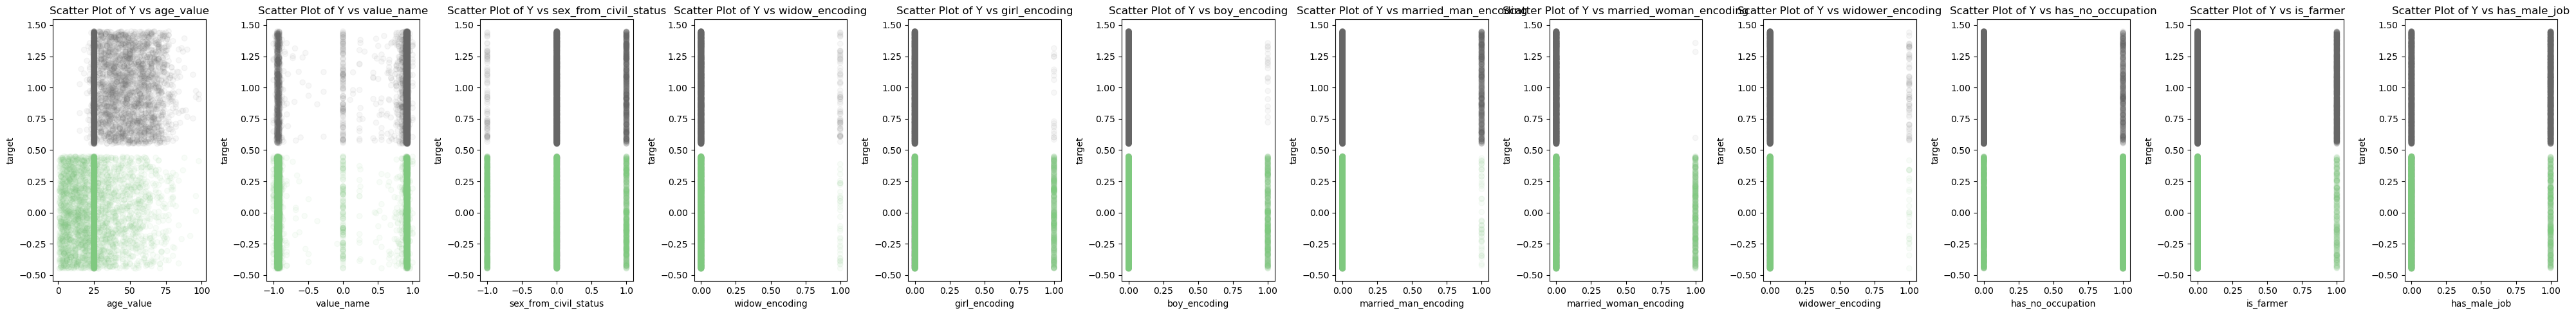

In [174]:
df_sub = df_recensement[["age_value", "value_name", "sex_from_civil_status", 
                         "widow_encoding", "girl_encoding", "boy_encoding", "married_man_encoding", 
                         "married_woman_encoding", "widower_encoding",
                         "has_no_occupation", "is_farmer", "has_male_job", 
                         "target"]]

# J'écarte ici les valeurs de l'indicatrice "être un chef de famille" afin de mieux voir les graphes
df_sub["target_blurred"] = df_sub["target"] + np.random.uniform(low=-0.45, high=0.45, size=len(df_sub['target']))

fig, axes = plt.subplots(nrows=1, ncols=len(df_sub.columns) - 2, figsize=(3 * len(df_sub.columns) - 2, 5))

# Iterate over each column
for i, column in enumerate(df_sub.columns[:-2]):  # Exclude the last column 'Y'
    # Filter out rows with NaN values in the current column
    filtered_df = df_sub.dropna(subset=[column])
    
    # Create scatter plot for current column against 'Y'
    axes[i].scatter(filtered_df[column], filtered_df["target_blurred"], c=filtered_df['target'], cmap='Accent', alpha=0.05)
    
    # Set title for each subplot
    axes[i].set_title('Scatter Plot of Y vs {}'.format(column))
    
    # Set labels for each subplot
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('target')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

C:\Users\Serv3\AppData\Local\Temp\ipykernel_19600\2653249616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["target_blurred"] = df_sub["target"] + np.random.uniform(low=-0.45, high=0.45, size=len(df_sub['target']))


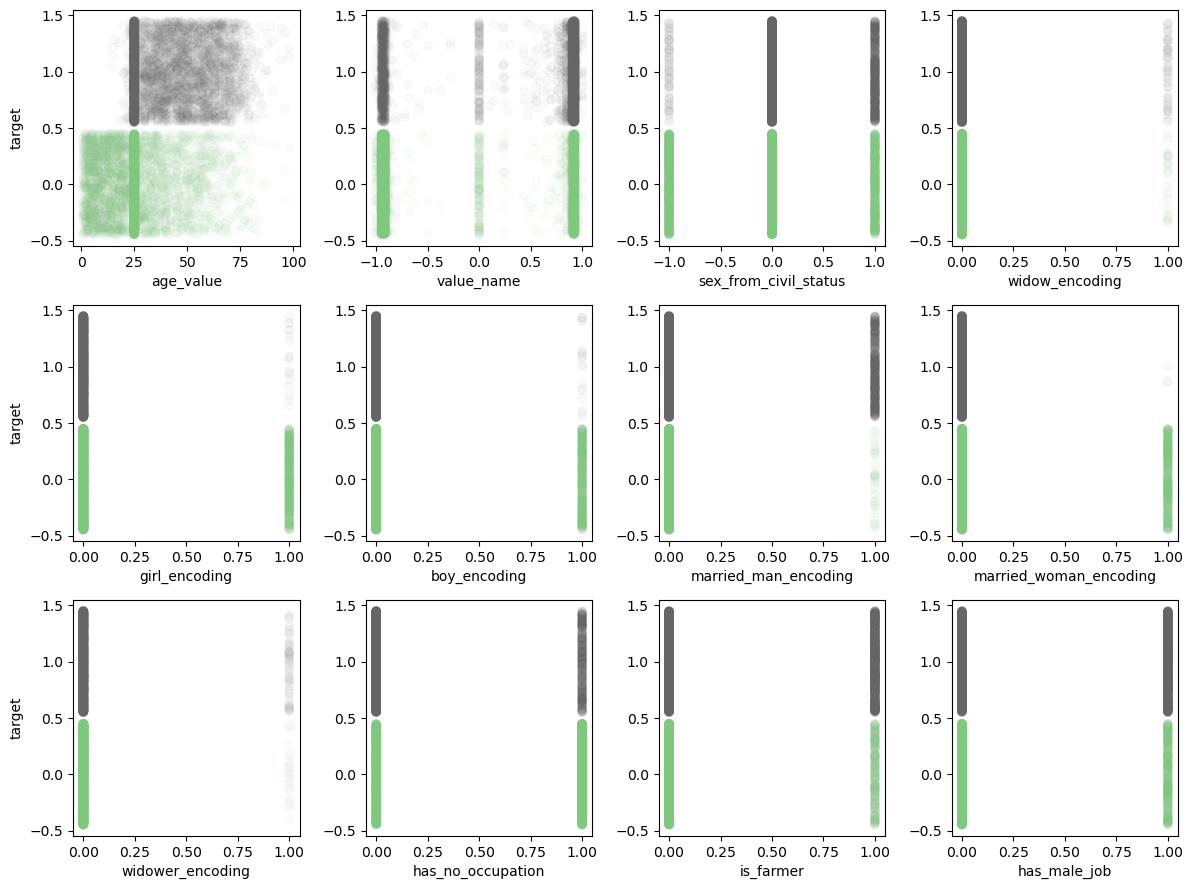

In [175]:
# J'écarte ici les valeurs de l'indicatrice "être un chef de famille" afin de mieux voir les graphes
df_sub["target_blurred"] = df_sub["target"] + np.random.uniform(low=-0.45, high=0.45, size=len(df_sub['target']))

# Create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))  # 3 rows, 4 columns

# Iterate over each column
for i, column in enumerate(df_sub.columns[:-2]):  # Exclude the last column 'Y'
    # Calculate the row and column index for the subplot
    row_index = i // 4  # Integer division to get the row index
    col_index = i % 4   # Modulus operator to get the column index
    
    # Filter out rows with NaN values in the current column
    filtered_df = df_sub.dropna(subset=[column])
    
    # Create scatter plot for current column against 'Y'
    axes[row_index, col_index].scatter(filtered_df[column], filtered_df["target_blurred"], c=filtered_df['target'], cmap='Accent', alpha=0.03)
    
    # Set title for each subplot
    #axes[row_index, col_index].set_title('Scatter Plot of Y vs {}'.format(column))
    
    # Set labels for each subplot
    axes[row_index, col_index].set_xlabel(column)
    if col_index == 0:
        axes[row_index, col_index].set_ylabel('target')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [176]:
df_recensement.columns

Index(['index', 'age', 'birth_date', 'civil_status', 'employer', 'firstname',
       'link', 'lob', 'nationality', 'occupation', 'surname',
       'surname_household', 'target', 'value_name', 'sex_from_civil_status',
       'widow_encoding', 'widower_encoding', 'married_man_encoding',
       'girl_encoding', 'boy_encoding', 'married_woman_encoding',
       'has_no_occupation', 'is_farmer', 'has_male_job', 'age_is_None',
       'age_value'],
      dtype='object')

In [177]:
columns_to_drop = ['age', 'index', 'birth_date', 'civil_status', 'employer', 'firstname',
       'link', 'lob', 'nationality', 'occupation', 'surname',
       'surname_household']

df_modelisation = df_recensement.drop(columns=columns_to_drop)

In [178]:
df_modelisation.isnull().sum()

target                    0
value_name                0
sex_from_civil_status     0
widow_encoding            0
widower_encoding          0
married_man_encoding      0
girl_encoding             0
boy_encoding              0
married_woman_encoding    0
has_no_occupation         0
is_farmer                 0
has_male_job              0
age_is_None               0
age_value                 0
dtype: int64

## Modélisation

#### Importation

In [179]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import GridSearchCV

#### Splitting of the data

In [180]:
X = df_modelisation.drop('target', axis=1)  # Features
y = df_modelisation['target']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### First modelisation

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', GradientBoostingClassifier())
])

In [ ]:
# Effectuer une validation croisée sur le pipeline
scores = cross_val_score(pipeline, X_train, y_train, cv=3)
print("Cross-validation scores:", scores)

In [ ]:
# Entraîner le modèle sur les données d'entraînement
pipeline.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = pipeline.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

In [ ]:
import seaborn as sns

conf_matrix = np.array([[794, 111], [154, 796]])

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Greens', cbar=False)  # cbar=False removes the color bar
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Loop through each cell to add numbers directly
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        if i == j:
            plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='white')
        else:
            plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='black')

plt.show()

#### Comparaison des modèles

In [ ]:
models = [("knn", KNeighborsClassifier())]
grids = {"knn" : {'knn__n_neighbors': [1, 2, 3, 5, 10, 20]}}
for name, model in models:
    pipe = Pipeline(steps=[(name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

In [ ]:
models = [("randomforest", RandomForestClassifier(verbose=False))]
grids = {"randomforest" : {'randomforest__max_depth': [2, 3, 5, 10, 20, None]}}
for name, model in models:
    pipe = Pipeline(steps=[(name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ("gaussian", GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42))
])
scores = cross_val_score(pipe, X_train, y_train, cv=3)
print("Cross-validation scores:", scores)

# pipe.fit(X_train, y_train)
# y_pred = pipe.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [ ]:
print("CV score :")
print("GaussianProcessClassifier |", np.mean([0.84148807, 0.84795795, 0.8410837]))
print("RandomForestClassifier (max_depth=10) |", 0.84807149)
print("KNeighborsClassifier (n_neighbors = 20) |", 0.8274758)
print("GradientBoostingClassifier |", np.mean([0.84674484, 0.85442782, 0.84350991]))

#### Importance des variables explicatives

In [189]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestClassifier(verbose=False, max_depth=10))
])

In [190]:
# Effectuer une validation croisée sur le pipeline
scores = cross_val_score(pipeline, X_train, y_train, cv=3)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.85725839 0.85361909 0.83825313]


In [191]:
# Entraîner le modèle sur les données d'entraînement
pipeline.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = pipeline.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.844743935309973


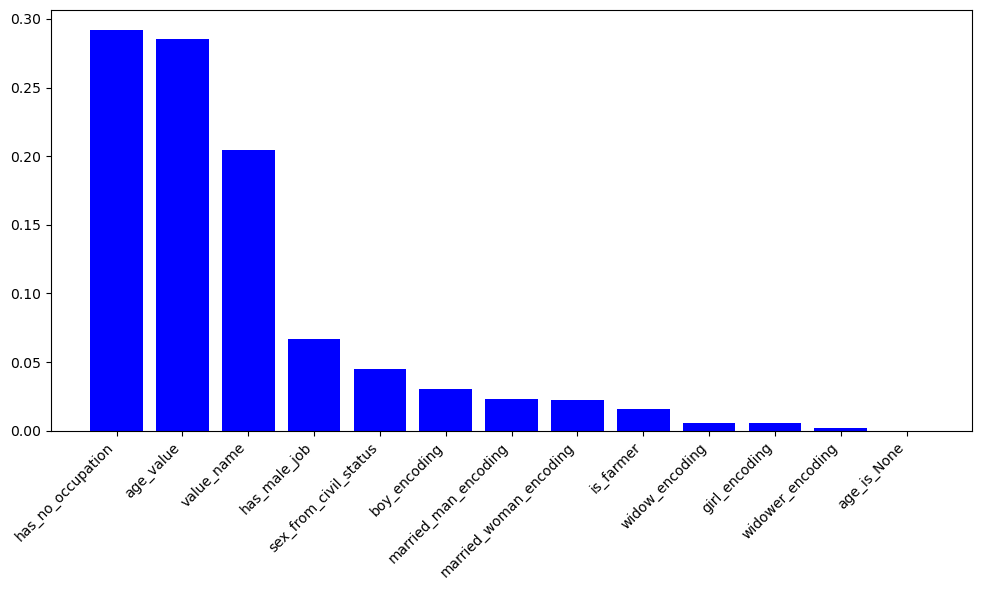

In [192]:
importances = pipeline.named_steps['random_forest'].feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
#plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45, ha="right")
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()